## Microsoft Studios Project


* ### Student name: Leah Kalumba Katiwa
* ### Student pace: Full Time
* ### Instructor name: William Okomba
* ### Blog post URL:https://github.com/leah-katiwa/dsc-phase-1-project-v2-4.git


### Project Overview

For this project, we will use exploratory data analysis to generate insights for a business stakeholder.

**Following the creation of movie studio, we have been tasked by Microsoft, who have no idea about making films, to identify what makes a film perform well at the box office. After identifying return on investment (RoI) as the primary metric of success, we narrowed down the datasets provided to the top 200 most grossing movies worldwide then calculated the RoI for each. After plotting several scatter and bar plots comparing runtime, production budget, gross revenue, release date, genre, directors, writers, and rating, the analysis identified the following:
The best time to release a film is during Summer.
Films directed by Kyle Balda, Pierre Coffin, Chris Rennaud, David F. Sandberg, and James Wan perform the best, whereas those Gary Dauberman were the most successful of all the other writers.
Lastly we that length of a film, gross revenue and rating, and have no impact on the RoI of a film.

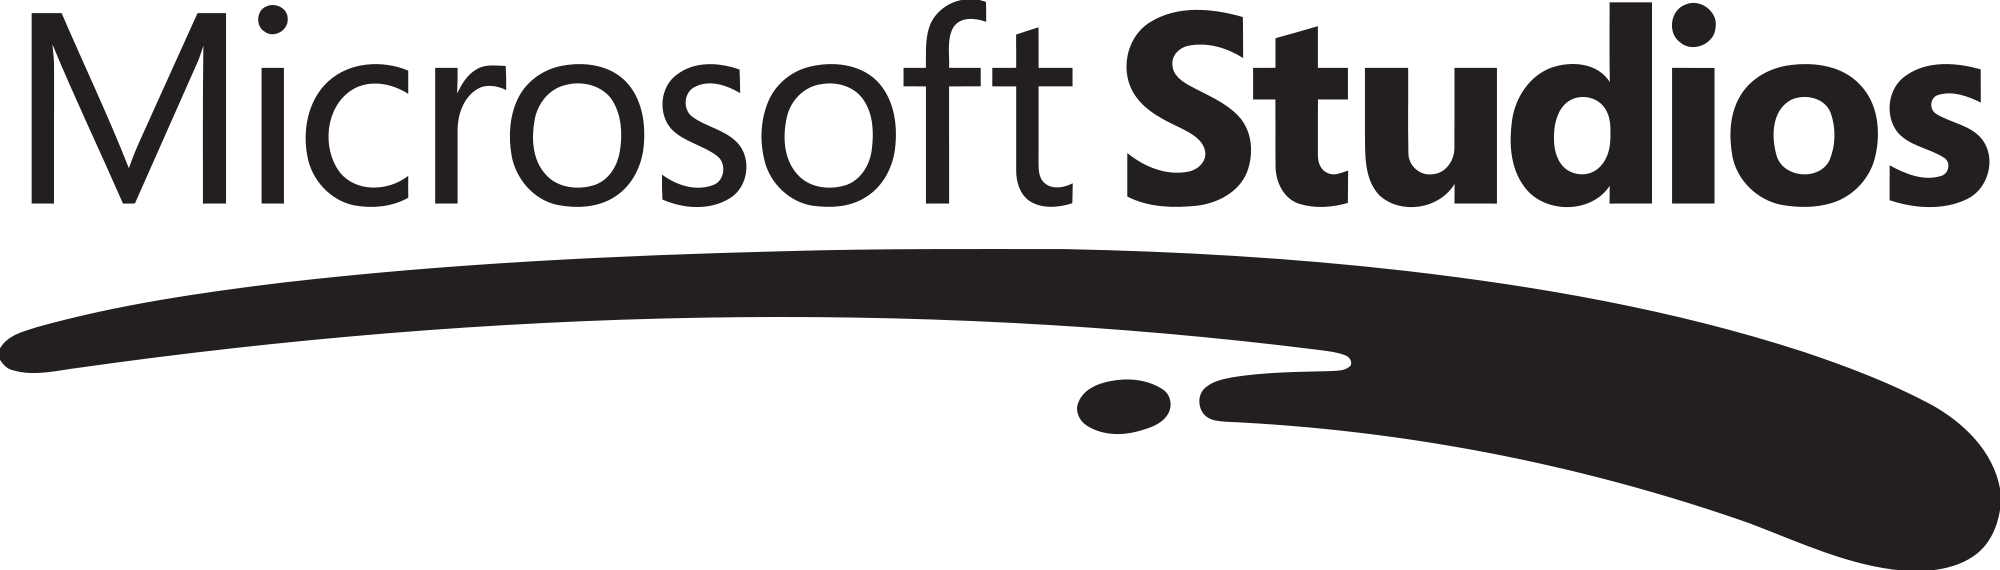

### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Microsoft's new studio can use to help decide what type of films to create.

**Microsoft has decided to enter the original video content scene by creating a new movie studio. However, they don't know anything about creating movies. In order to solve this problem, the analysis shall be centered around answering the following question:

What types of films are currently performing the best at the box office?
According to this Holywood Reporter article, we see that the metric used to determine performance of a movie at the box office may vary. Therefore, it is important to clarify that within this analysis, the metric that shall be used to determine the success of a movie will be based on the return on investment (RoI) of the highest grossing films. RoI is an important performance measure used by businesses to evaluate the profitability of an investment or compare the efficiency of a number of different investments.

In order to further understand the types of movies that are currently performing the best at the box office, this analysis will look into the impact following features have on the RoI:

Runtime

Production Budget

Gross Revenue

Release Date

Genre

Directors

Writers

Rating

# EDA

In [1]:
#we import the libraries that we will need 

#pandas for data analysis
import pandas as pd

#NumPy for numerical analysis
import numpy as np

# matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sqlite3 for database management
import sqlite3

# 1. Bom Movie CSV Dataset

### Data Understanding

In [2]:
#we load the given dataset and view the data
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
#we check the shape of the data - shows number of rows and columns
bom_movie.shape

(3387, 5)

In [4]:
#We use bom_movie.info to get a concise summary of the dataframe i.e including the column names, data types, and the number of non-null values in each column.
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
#We use .describe() to calculate the basic summary statistics for each column with numerical data.
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Data Cleaning

In [6]:
#we check the column labels of the Dataframe
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [7]:
#we identify for duplicated values
bom_movie.duplicated().sum()

0

shows there is no duplicated values

In [8]:
#we check for any missing data values
bom_movie.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

If there is at least one missing value in a column or row, the corresponding element in the resulting boolean Series is True; otherwise, it is False.

In [9]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Observation: 'studio' has 5 missing values, 'domestic_gross' has 28 and 'foreign gross'  has 1350 missing values.

In [10]:
#We drop the 'foreign gross' column has lots of missing values which may result to biased data and invalid statistical conclusions.
bom_movie.drop("foreign_gross", axis=1, inplace=True)

In [11]:
#We replace the missing values in the domestic gross column with the mean value
mean_bom = bom_movie['domestic_gross'].mean()
bom_movie['domestic_gross'].fillna(mean_bom, inplace = True)

In [12]:
#We replace the missing values in the studio column with the mode value
mode_bom = bom_movie['studio'].mode()[0]
bom_movie['studio'].fillna(mode_bom, inplace = True)

we use mode since is a measure of central tendency that represents the most commonly occurring value in a dataset.

In [13]:
#we check the summarised data to confirm our changes
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


The studio non-null count now reads 3387 which is the total number of rows -all the missing values have been replaced

In [14]:
# we check the frequency of each studio
bom_movie['studio'].value_counts().head(5)

IFC      171
Uni.     147
WB       140
Magn.    136
Fox      136
Name: studio, dtype: int64

### Data Analysis 

 we group studio data with domestic gross to see the performance of each studio within the home country
domestic_gross_ = bom_movie.groupby('studio')["domestic_gross"].sum()
domestic_gross_.sort_values(ascending = False).head()

In [15]:
#we identify the top 10 best selling studios withing the country( consider the domestic gross)
# Order the studios from the one that has the highest domestic gross
bom_movie.sort_values(by='domestic_gross', ascending=False, inplace=True)
domestic_gross_by_studio  = bom_movie.groupby(['studio'])['domestic_gross'].sum().sort_values(ascending=False).head()
domestic_gross_by_studio

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.488429e+09
Name: domestic_gross, dtype: float64

### Data visualization

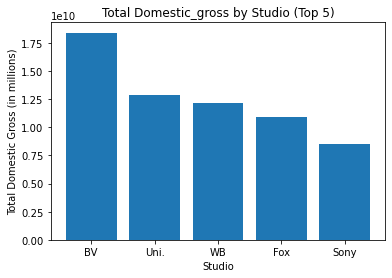

In [16]:
#Visualizing the first top_10_studios with the highest domestic gross
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(domestic_gross_by_studio.index, domestic_gross_by_studio.values)

# Set the title and axis labels
ax.set_title('Total Domestic_gross by Studio (Top 5)')
ax.set_xlabel('Studio')
ax.set_ylabel('Total Domestic Gross (in millions)')
plt.show()

### Observation

**The graph displays the top 5 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows  the studios name, and the y-axis shows their domestic gross in millions.From the bar graph it's evident that BV, Uni, WB Studio, Fox, and Sony are the top 5 best performing  studios in terms of domestic gross.Microsoft should consider partnering with these established and well successful studios since they already have a substantial fan-base for their products.

# 2. TN MOVIE BUDGETS FILE

### Data Understanding

In [17]:
#we load the tn movie dataset and view the data
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [18]:
#we check the shape of the data to know the number of rows and columns of our data
movie_budgets.shape

(5782, 6)

This data has 5782 rows and 6 columns.

In [19]:
#we check a summary of the data i.ethe column names, data types, and the number of non-null values in each column.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This dataset contains data in the float, interger and object types.

### Data Cleaning

In [20]:
#we check for any duplicated values
movie_budgets.duplicated().sum()

0

There is no duplicated values in the dataset

In [21]:
#we check for any missing values
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values rows in the data set.

In [22]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values

movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [23]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types( in decimal points)
movie_budgets.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

production_budget,domestic_gross,worldwide_gross are now in float form that is decimal place

In [24]:
#we preview our data again
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


As seen above, the values in the release_date column are object data type. We have to convert in order to use the data.

In [25]:
# we convert the release date from an object
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [26]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets['day'] = movie_budgets['release_date'].dt.day

#we print the updated dataframe
print(movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

      production_budget  domestic_gross  worldwide_gross  year  month  day  
0           425000000.0     760507625.0     2.776345e+09  2009     12   18  
1    

Now our release date is in form of a datetime not object  anymore

In [27]:
#We confirm from the above updated dataframe if th of the data to see the changes that we have made
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
 8   day                5782 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 406.7+ KB


In [28]:
#we check summary statistics data 
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,year,month,day
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000,5782.000000,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,2003.967139,7.050675,16.401245
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,12.724386,3.480147,8.803660
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,1915.000000,1.000000,1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,2000.000000,4.000000,9.000000
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,2007.000000,7.000000,17.000000
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,2012.000000,10.000000,24.000000
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2020.000000,12.000000,31.000000


### Data Analysis 

#### Correlation
To determine whether there is a correlation between the production budget, domestic gross, and worldwide gross variables,perform a correlation analysis to determine if there is a strong, moderate, or weak linear relationship between them.

In [29]:
# generate a correlation matrix
correlation_matrix = movie_budgets[['production_budget','domestic_gross','worldwide_gross']].corr()
correlation_matrix

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


# Data Visualization

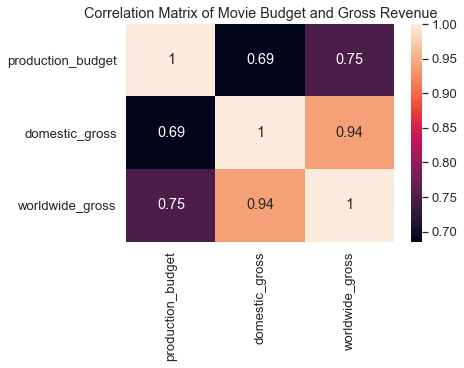

In [30]:
# Plot a heatmap sowing the correlation between these variables
sns.set(font_scale=1.2)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Movie Budget and Gross Revenue')
plt.show()

Based on the correlation matrix, there is a strong positive correlation between the production budget  both with the domestic and worldwide gross. This means that as the production budget increases, the domestic and worldwide gross also increase. Therefore, if Microsoft wants to generate maximum profits it should consider investing more money in its production budget of its movies. However, it is important to note that correlation  alone does not imply causation and therefor other factors also affect the success of a movie.

In [31]:
#calculating and creating a new column in the dataframe named Return on Investment (ROI)
movie_budgets['return_on_investment'] = ((movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['production_budget']) * 100
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_investment
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636


In [32]:
# Create a new column that contains the month that the movies were released
release_time = movie_budgets.copy()

release_time['release_month'] = release_time["release_date"].dt.strftime('%B').astype(str)

release_time.head() # Preview the updated 'release_time_df' DataFrame

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_investment,release_month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,12,18,553.257713,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,5,20,154.667286,May
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,6,7,-57.210757,June
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,5,1,324.384139,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,12,15,315.369636,December


# Data Visualization

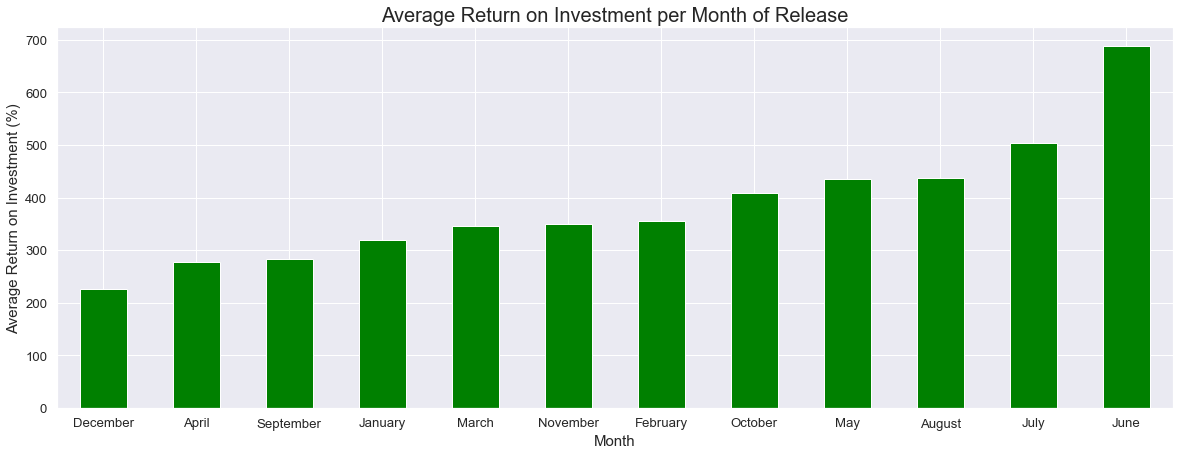

In [33]:
# Create a plot that shows average return on investment (RoI) by month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['return_on_investment'].mean().sort_values().plot(kind='bar', color='green')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

Observation:The highest return on investment for movie release is on june .Microsoft studio should consider releasing their movies on June  since its potraying to have  the highest return on Investment.

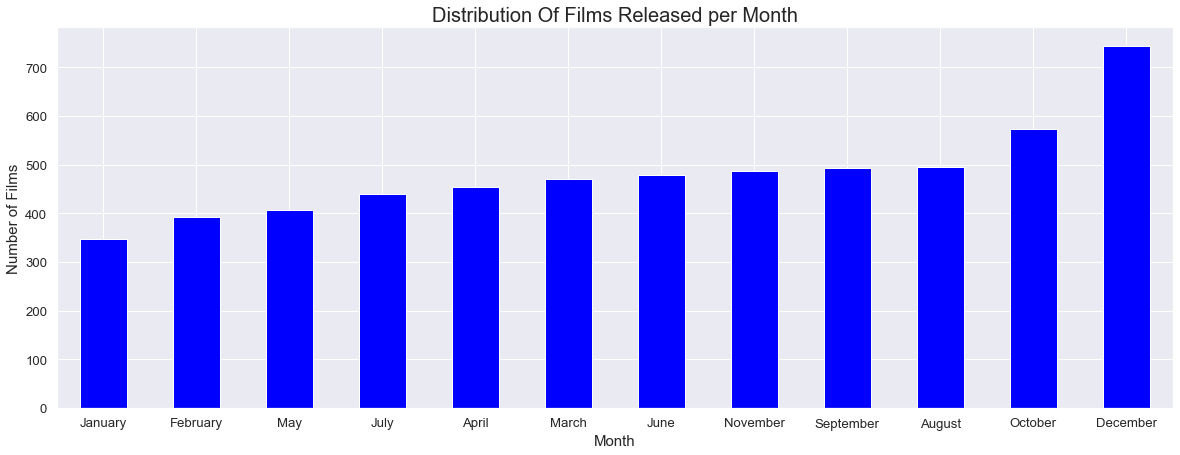

In [34]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['movie'].count().sort_values().plot(kind='bar', color='blue')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Month', fontsize=20);

Observation :December has the highest number of films released as shown above  therefore microsoft should consider releasing their  films during that month but bearing in mind that  month of film release has slight effect on the number of films released

# 3. IMDB file

The ERD (Entity Relation Diagram) for this database is shown below:

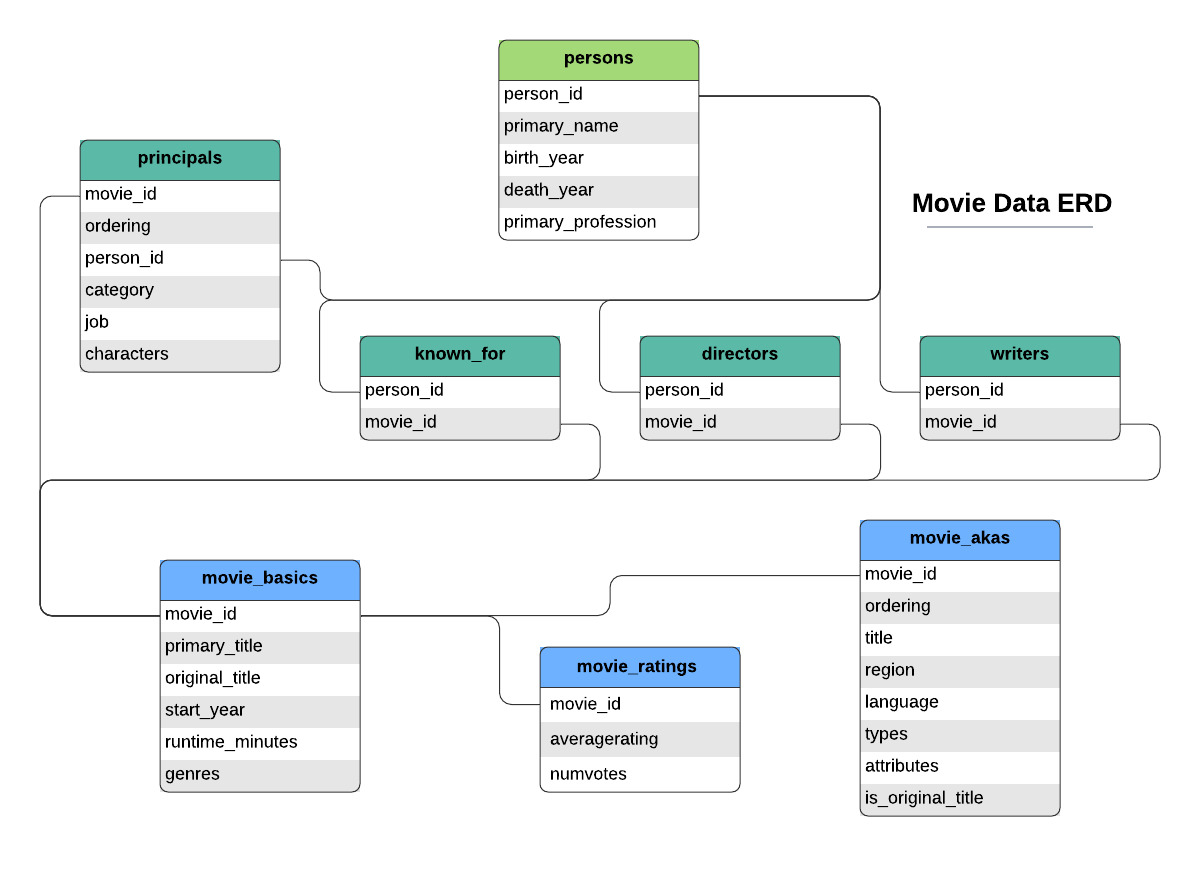

### Data Understanding

In [35]:
#we connect to the database
conn = sqlite3.connect("im.db")

In [36]:
#we import data from the movie_basics file.
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [37]:
#We check concise summary of the dataframe i.e the column names, data types, and the number of non-null values in each column.
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The table contains object, float and integer as data types.

In [38]:
#We import data from the movie_ratings file.
imdb_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
"""
            ,conn)
imdb_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The table contains object, float and integer as data types.

In [39]:
#We then join the two movie basics and movie rating using a unique identifier (movie_id).
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);
""",conn)
imdb.head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [40]:
#We check the concise summary of the dataframe i.e the column names, data types, and the number of non-null values in each column.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


The joined table contains object, float and integer as data types.

### Data Cleaning

In [41]:
#we check for missing values in the imdb data
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

runtime_minutes column has 7,620 missing values while genres column has 804 missing values.

In [42]:
#we check for any duplicated data 
imdb.duplicated().sum()

0

There are no duplicated data in the rows.

In [43]:
# how to confirm the most occuring genre
imdb['genres'].value_counts()

Drama                         11612
Documentary                   10313
Comedy                         5613
Horror                         2692
Comedy,Drama                   2617
                              ...  
Documentary,Family,Musical        1
Action,Family,Mystery             1
Fantasy,Horror,Romance            1
Action,Adventure,Musical          1
Fantasy,Horror,Western            1
Name: genres, Length: 923, dtype: int64

Drama has a frequency of 11612 hence the most occuring genre

In [44]:
#Since the 'genre' column is categorical data, we replace the missing values with the mode (most-occurring value)
imdb['genres'].mode()[0]

'Drama'

In [45]:
#We replace the missing values in the genres column with drama (most occuring genre)

imdb_mode = imdb['genres'].mode()[0]
imdb['genres'].fillna('imdb_mode', inplace = True)

In [46]:
#we check a summary of the data to check update of our work
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [47]:
#we confirm if there is still missing
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [48]:
# we replace the missing values in the runtimme_minutes
imdb_mean = imdb['runtime_minutes'].mean()
imdb['runtime_minutes'].fillna('imdb_mean', inplace = True)


In [49]:
#  we get to confirm our concise summary of our data
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


### Data Analysis 

In [50]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 1000000 AND averagerating BETWEEN 6.5 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [51]:
mean_of_genres = pd.DataFrame(im_db.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
mean_of_genres

,numvotes
genres,
"Action,Adventure,Sci-Fi",1512360.5
"Action,Thriller",1387769.0
"Adventure,Drama,Sci-Fi",1299334.0
"Drama,Western",1211405.0
"Biography,Crime,Drama",1035358.0
"Mystery,Thriller",1005960.0


# Data Visualization

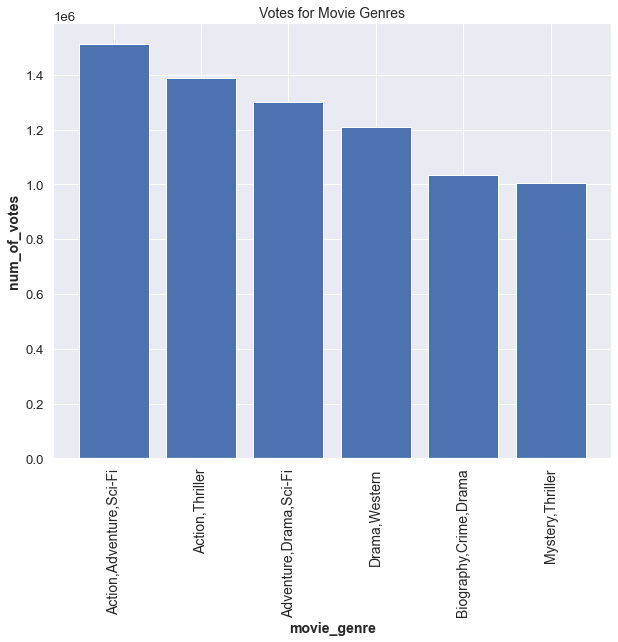

In [52]:
#ploting a bar chart to show relationship between number of votes and move genre
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=14)
y = mean_of_genres["numvotes"]
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')
plt.title('Votes for Movie Genres', fontsize=14);
plt.bar(y.index, y.values);

Observation:The bar chart above can be used show which movie genre is most populary used hence this is of importance to microsoft in deciding on which movie genre to produce consider the demand in the market.

#### Correlation

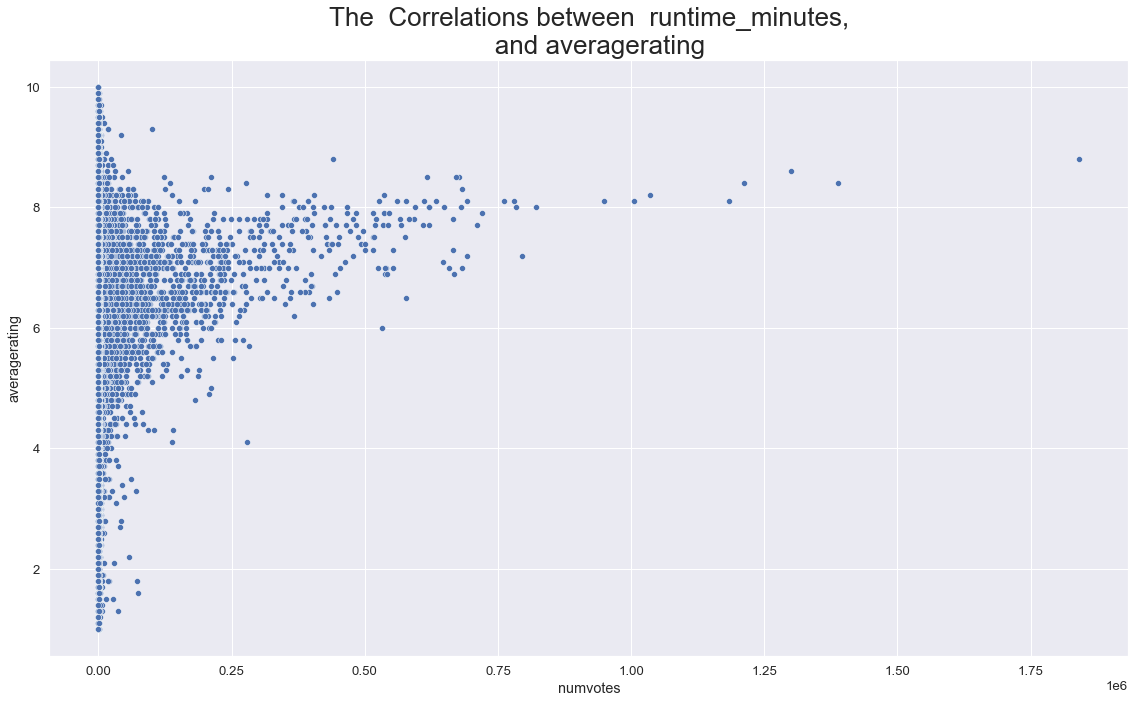

In [53]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='numvotes', y='averagerating', data = imdb)
plt.title("The  Correlations between  runtime_minutes,\n   and averagerating", fontsize=26)
plt.tight_layout()
plt.show()

Observation: The correlation between the runtime and the number of votes is positive but weakly related hence microsoft should note that the runtime and number of votes have small or zero relationship.

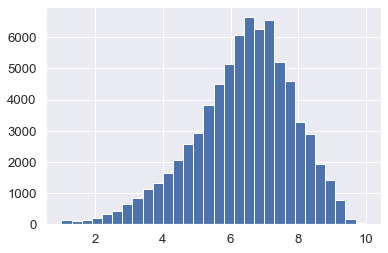

In [54]:
plt.hist(imdb['averagerating'], bins = 30);

Observations:The histogram has 10 bins representing the range of values of 'averagerating' that is it was rated out of 10. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.
The distribution of 'averagerating' appears to be slightly skewed to the right, indicating that the majority of the films have a rating of 6-8 on a scale of 1-10, microsoft should ensure rating ranges btn 6-8 so as to survive in the market .

# RECOMMENDATIONS

From the bom data Microsoft should consider working hand in hadn with BV,Uni,Wb,fox and Sony since they are the top 5 studios considering the domestic gross.By merging with these top studio will give Microsoft a competitive advantage in the market and this will result to high profit generation in Microsoft studio.

Based on the budget data microsoft should consider having efficient capital as their mean of financing their studio since its evident that in consideration of other factors the higher the production budget the higher the domestic gross and the higher the worldwide gross too.In this movie production industry the quality of the performance is through efficient production budget.

Considering the imdb data Microsft should consider producing Action, Adventureand Sci-Fi movies since they are the most watched genres  in the current market hece to be on the safe side it should consider the market scale.This is affect the voting carried out during the research. 

# NEXT STEP

Microsoft should consider doing further research to identify how different runtimes perform so as to be the best and outrun the other studios.

Microsoft should be careful on their return on investment since quality beats quantity hence producing more films can have less return on investment in the case where the number of films produced were of low quantity and less demanded in the market while the few  number of films are of high quality and produced according to the market demand consider supply demand force thhat is producing what is highly demanded 

Microsoft should carry a research on how the marketing of their band has positive impact on the return on income in this case advertsing of their released movie film through well established and best selling  industry is a bonus to  their high return on investment of their quality work examaple  work in partnership with Netflix or prime video.

Microsoft should narrow down how different director and specific actors spice up the quality of the movie hence leading to high return on investment